<center><h1>MINERIA DE DATOS</h1>
<strong>Taller Agrupación</strong><br />
PROFESORA ELIZABETH LEON GUZMAN <br />
<strong>TEMA</strong> Algoritmos de Agrupación</center>

-------
Práctica correspondiente a Agrupación (modelamiento no supervisado) usando diferentes distancias y similitudes para los algoritmos:

* K-means
* Hierarchical clustering
--------

**SOLUCIONADO POR: Andrea Carolina Mora y Juan Camilo Hernández**

## K-means

### Ejemplo 1
Ejecución del algoritmo k-means en un conjunto de datos de juguete de calificaciones de películas

In [1]:
#Se crea el conjunto de datos y se visualiza
import pandas as pd

titulos = ['usuario','El viaje de Chihiro','Star Wars','The Matrix','Advengers','Malefica']
puntajes = [['juan',1,5,5,4,2],['ana',2,4,5,3,2],['luis',2,4,4,5,3],['jorge',4,2,2,3,5],['maría',5,1,2,3,4],['oscar',4,2,1,4,5],['mariana',3,5,5,5,3]]
peliculas = pd.DataFrame(puntajes,columns=titulos)
peliculas

,usuario,El viaje de Chihiro,Star Wars,The Matrix,Advengers,Malefica
0,juan,1,5,5,4,2
1,ana,2,4,5,3,2
2,luis,2,4,4,5,3
3,jorge,4,2,2,3,5
4,maría,5,1,2,3,4
5,oscar,4,2,1,4,5
6,mariana,3,5,5,5,3


Para este conjunto de dtaos los tres primeros usuarios y el últomo les gusta las películas de acción, mientras a los tres usuarios restantes les gusta películas de drama. La idea es aplicar el algoritmo de k-means para encontrar los dos grupos de usuarios con preferencias similares de películas. Es necesario remover la primera columna, correspondiente al usuario, ya que no es importante para la agrupación.

In [2]:
# Se importa los algoritmos de grupación de la libreria de sklearn
from sklearn import cluster

data = peliculas.drop('usuario',axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data)
labels = k_means.labels_
# La asignación de grupo a cada usuario es visualizada como un objeto dataframe
pd.DataFrame(labels, index=peliculas.usuario, columns=['ID Grupo'])

c:\Users\acmor\miniconda3\envs\mlcourse\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,ID Grupo
usuario,
juan,1
ana,1
luis,1
jorge,0
maría,0
oscar,0
mariana,1


Los redultados de la agrupación son lo esperado: el algoritmo asignó los tres primeros usuarios y el último al cluster 1, y los otros tres usuarios al cluster 0.

In [3]:
#Visualización de los centroides de los grupos:

In [3]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,El viaje de Chihiro,Star Wars,The Matrix,Advengers,Malefica
0,4.333333,1.666667,1.666667,3.333333,4.666667
1,2.000000,4.500000,4.750000,4.250000,2.500000


El grupo 0 corresponde con el perfil del usuario que prefiere las películas de drama, mientras el grupo 1 correponde con el perfil de usuarios que prefiere películas de acción.

Estos centroides son el modelo de agrupación, por lo que pueden ser usados para predecir el perfil de un nuevo usuario de acuerdo a la calificación que le asigne a las películas. Por ejemplo, se tienen las siguientes nuevas calificaciones:

In [5]:
import numpy as np

testData = np.array([[1,4,5,4,2],[5,3,2,2,4],[4,2,3,3,1],[3,3,2,3,3],[4,5,4,1,4]])
labels = k_means.predict(testData)
labels = labels.reshape(-1,1)
usernames = np.array(['pedro','marco','liz','nico','ligia']).reshape(-1,1)
cols = peliculas.columns.tolist()
cols.append('Cluster ID')
newusers = pd.DataFrame(np.concatenate((usernames, testData, labels), axis=1),columns=cols)
newusers

c:\Users\acmor\miniconda3\envs\mlcourse\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,usuario,El viaje de Chihiro,Star Wars,The Matrix,Advengers,Malefica,Cluster ID
0,pedro,1,4,5,4,2,1
1,marco,5,3,2,2,4,0
2,liz,4,2,3,3,1,0
3,nico,3,3,2,3,3,0
4,ligia,4,5,4,1,4,1


### Ejemplo 2
Ejecución del algoritmo k-means a un conjunto de datos sintetico de dos dimensiones numéricas, de 1000 puntos

In [6]:
# Importar funciones y conjunto de datos

import pandas as pd
from sklearn import cluster
#from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [7]:
X = pd.read_csv("cluster1.csv")
X["x0"] = [float(str(i).replace(",", "")) for i in X["x0"]]

La función predict asigna clusters a los ejemplos



In [8]:
# Lee el archivo de puntos

n_clusters = 2
# ejecuta el k-means con k=2
km = cluster.KMeans(n_clusters=2)
km.fit(X)
y = km.predict(X)
X.shape

c:\Users\acmor\miniconda3\envs\mlcourse\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(500, 2)

In [9]:
#Lista los centroides de los clusters
km.cluster_centers_


array([[ 4.5061742 , -0.68473232],
       [ 8.01615594,  9.85357474]])

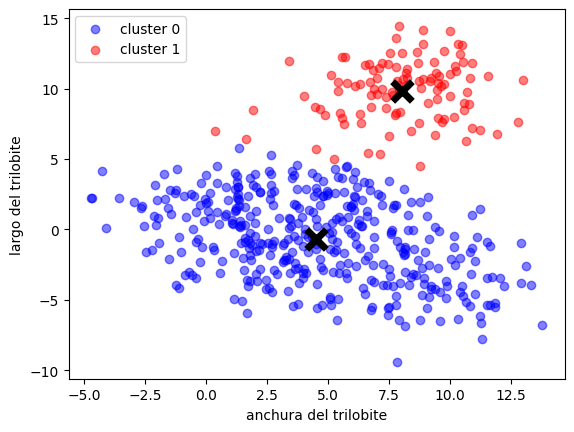

In [10]:
cmap = plt.cm.plasma

cmap((y*255./(n_clusters-1)).astype(int))
for i in np.unique(y):
    cmap = plt.cm.bwr
    col = cmap((i*255./(n_clusters-1)).astype(int))
    Xr = X[y==i]
    plt.scatter(Xr["x0"], Xr["x1"], color=col, label="cluster %d"%i, alpha=.5)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],marker="x", lw=5, s=200, color="black")
plt.legend()
plt.xlabel("anchura del trilobite")
plt.ylabel("largo del trilobite");

## Iteración del kmeans

array([[-5.78559017,  3.3755293 ],
       [ 0.99214633, -1.36319809],
       [-1.08986597, -9.590043  ],
       ...,
       [ 1.30914902, -1.08475578],
       [ 1.02187503, -1.2140079 ],
       [-3.91933617, -4.34027934]])

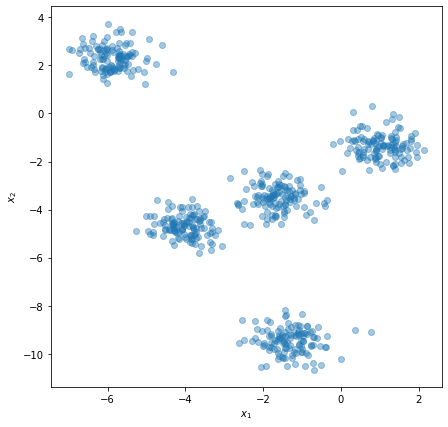

In [11]:
from sklearn.datasets import make_blobs
np.random.seed(2)
# Creación de un dataset sintético de 5 grupos con 600 puntos (se incluyen valores negativos)
X,_=make_blobs(n_samples=600,centers=5, cluster_std=0.5)
plt.figure(figsize=(7,7))
plt.scatter(X[:,0],X[:,1],alpha=0.4)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X

In [12]:
# Definición de una funcion del simplekmeans para ver por iteraciones
from sklearn.metrics.pairwise import euclidean_distances
def simple_kmeans(X,k, iter=100):
    # Inicializacion de los primeros centroides
    init_clus=np.random.choice(np.arange(X.shape[0]),replace=False, size=k)
    print(init_clus)
    clusters=X[init_clus]
    preds=np.argmin(euclidean_distances(X,clusters),axis=1)
    all_clusters=[clusters.copy()]
    all_preds=[preds]
    for i in range(iter):
        for clus in range(k):
            clusters[clus]=X[preds==clus].mean(axis=0)
            all_clusters.append(clusters.copy())
            preds=np.argmin(euclidean_distances(X,clusters),axis=1)
            all_preds.append(preds.copy())
    return all_clusters,all_preds

all_clusters,all_preds=simple_kmeans(X,5)

[143  37 136 454 147]


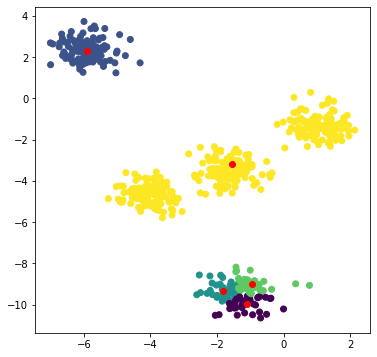

In [13]:
# Iteración 0. Se realiza la inicialización aleatoriamente, para el ejemplo son 5 puntos,
# y los demas puntos se asignan al cluster más cercano.

iteration=38 #@param {type:"slider", min:0, max:40, step:1}
plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],c=all_preds[iteration])
plt.scatter(all_clusters[iteration][:,0],all_clusters[iteration][:,1],c="r")


**Ejercicio 3.** 

Usar el algoritmo k-means y distancia Euclidean para agrupar los siguientes puntos en 3

grupos: A1=(2,10), A2=(2,5), A3=(8,4), A4=(5,8), A5=(7,5), A6=(6,4), A7=(1,2), A8=(4,9). Asumir los centroides iniciales: A1, A4 and A7.


Text(0, 0.5, 'Y')

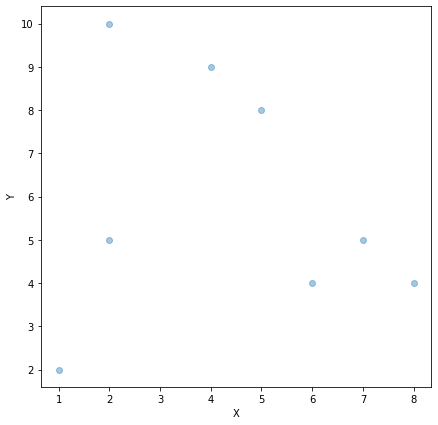

In [161]:
# Crear un diccionario con los datos
data = {
    'ID': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8'],
    'X': [2, 2, 8, 5, 7, 6, 1, 4],
    'Y': [10, 5, 4, 8, 5, 4, 2, 9]
}

# Crear un DataFrame a partir del diccionario
df = pd.DataFrame(data)

# Mostrar el DataFrame
plt.figure(figsize=(7,7))
plt.scatter(df['X'],df['Y'],alpha=0.4)
plt.xlabel("X")
plt.ylabel("Y")

In [162]:
# Reemplazar los centroides iniciales aleatorios con los puntos A2 y A5
init_clus = df.loc[df['ID'].isin(['A1', 'A4', 'A7']), ['X', 'Y']].values
init_clus

array([[ 2, 10],
       [ 5,  8],
       [ 1,  2]], dtype=int64)

In [163]:
df = df.drop('ID',axis=1)

In [164]:
# Definición de una funcion del simplekmeans para ver por iteraciones
from sklearn.metrics.pairwise import euclidean_distances
def simple_kmeans_with_ini_centroids(X, init_clus, k, iter=100):
    clusters=init_clus
    preds=np.argmin(euclidean_distances(X,clusters),axis=1)
    all_clusters=[clusters.copy()]
    all_preds=[preds]
    for i in range(iter):
        for clus in range(k):
            clusters[clus]=X[preds==clus].mean(axis=0)
            all_clusters.append(clusters.copy())
            preds=np.argmin(euclidean_distances(X,clusters),axis=1)
            all_preds.append(preds.copy())
    return all_clusters,all_preds

In [165]:
data = df.values
all_clusters,all_preds=simple_kmeans_with_ini_centroids(data, init_clus, 3)

a) Correr una iteración y mostrar: <br />

> 1) Los nuevos grupos <br />

> 2) Los nuevos centroides <br />



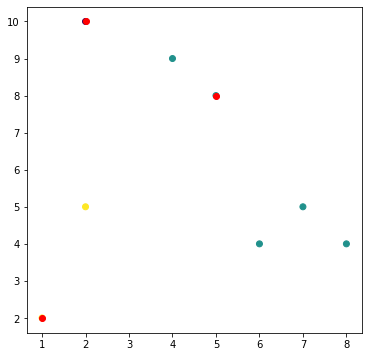

In [184]:
iteration=1
plt.figure(figsize=(6,6))
plt.scatter(data[:,0],data[:,1],c=all_preds[iteration])
plt.scatter(all_clusters[iteration][:,0],all_clusters[iteration][:,1],c="r")

En la primera iteración podemos ver que los centroides están muy cerca a los proporcionados inicialmente y k-means ya ha asignado puntos a los 3 clustres, sin embargo estos no son los clusters finales y se necesitan mas iteraciones

b) Iterar más. ¿Cuantas iteraciones se necesita para converger? <br />
* Se deben iterar 5 veces para encontrar correctamente los 3 clusters. A partir de esta iteraciíon K-means no cambia el resultado y ya encuentra los clusters y centoides finales

c) Mostrar gráficamente (los puntos y centroides) al converger: <br />

> 1) grupos finales <br />
> 2) centroides finales <br />

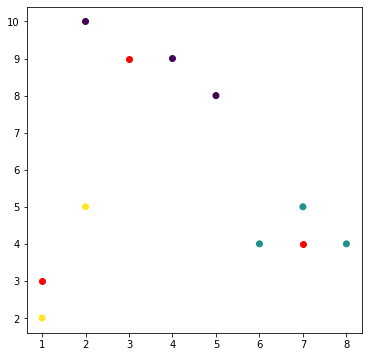

In [190]:
#imprimir la iteración 5 para mostrar los clusters y centroides finales
iteration=5
plt.figure(figsize=(6,6))
plt.scatter(data[:,0],data[:,1],c=all_preds[iteration])
plt.scatter(all_clusters[iteration][:,0],all_clusters[iteration][:,1],c="r")

**Clusters finales**
* Cluster 1: puntos amarilos
* Cluster 2: puntos azules
* Cluster 3: puntos morados

**Consulta**

**1. En que consiste la inicialización kmeans++:**

La inicialización KMeans++ es un método utilizado para inicializar los centroides, fue propuesto por David Arthur y Sergei Vassilvitskii en 2007. La inicialización KMeans++ mejora la inicialización aleatoria estándar, haciendo que la convergencia del algoritmo sea más rápida y, en general, mejorando la calidad de los resultados finales.

La inicialización KMeans++ funciona de la siguiente manera:

1. Elige el primer centroide al azar del conjunto de datos original.

2. Lurgo calcula las distancias al cuadrado (generalmente la distancia euclidiana) de cada punto al centroide más cercano que ya ha sido elegido.

3. Elige el siguiente centroide de tal manera que la probabilidad de elegir un punto como centroide sea proporcional a la distancia al cuadrado del punto al centroide más cercano que ya ha sido seleccionado.

4. Se repite el paso 2 y 3 hasta que se hayan seleccionado k centroides, donde k es el número de clústeres que se desean encontrar.

Esta estrategia asegura que los centroides iniciales estén bien dispersos en el espacio de características y, por lo tanto, es más probable que K-Means converja rápidamente hacia una solución óptima o cercana a la óptima.

2. **En que consiste el  Mini Batch K-Means:**

Mini Batch K-Means es una variante de K-Means que se utiliza para manejar grandes conjuntos de datos de manera más eficiente. A diferencia del K-Means estándar, que utiliza el conjunto de datos completo en cada iteración para actualizar los centroides, Mini Batch K-Means utiliza solo un subconjunto (mini lotes o mini-batches) del conjunto de datos para actualizar los centroides en cada iteración. Esta técnica hace que Mini Batch K-Means sea significativamente más rápido que K-Means estándar, especialmente cuando se trabaja con grandes conjuntos de datos. 

Debido a que Mini Batch K-Means utiliza solo un subconjunto del conjunto de datos en cada iteración, es menos preciso, pero ofrece una buena aproximación en un tiempo significativamente más corto. Es especialmente útil cuando se necesita aplicar K-Means en conjuntos de datos grandes que no caben en la memoria de la computadora.

## Determinar el número de k
La distancia intra-cluster mide qué tan compacto es cada cluster, ecisten varias medidas intra-cluster, una de ellas se define como:



$$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$$

k-means minimiza esta medida, y se utiliza para medir la calidad del cluster. El método consiste en  ejecutar varias veces el k-means con diferentes valores de k,  y graficar el valor de la inercia para cda k. La grafica resultante es una curva que desciende (a myor número de grupos menor la inercia). En esta gráfica se busca un valor de k tan pequeño como sea posible y que tenga un valor de la métrica bajo. A este tipo de gráfica se le conoce usualmente como gráfica de codo o *elbow*:

c:\Users\acmor\miniconda3\envs\mlcourse\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\acmor\miniconda3\envs\mlcourse\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Users\acmor\miniconda3\envs\mlcourse\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\acmor\miniconda3\envs\mlcourse\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\acmor\miniconda3\envs\mlcourse\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\acmor\miniconda3\envs\mlcourse\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

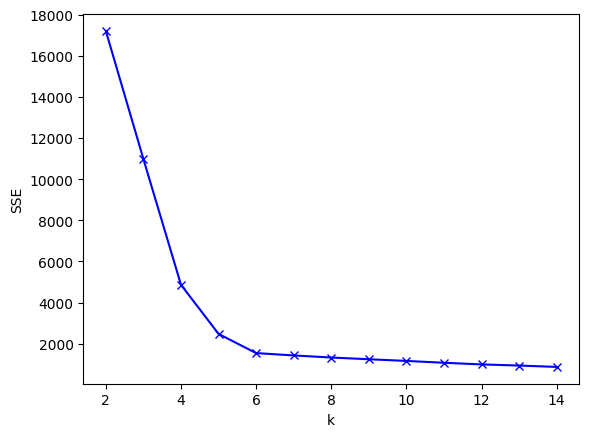

In [14]:
# Creamos un conjunto sintetico
# Se ejecuta Kmeans, para valores de k entre 2 y 15 y se grafica la inercia con respecto al número de clusters
X,_ = make_blobs(600, cluster_std=1.2, centers=6, random_state=10)

Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = cluster.KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()


In [15]:
# Graficamos los clusters, para visualizar los centroides y comparar con la gráfica del codo
#experiment_number_of_clusters(X, KMeans(), show_metric=True)


**Ejercicios:** 

**4.**  Calcular la gráfica del codo para el ejemplo 1 (calificaciones de películas)

**5.** Entrenar un modelo K-means con un conjunto de datos en dos dimensiones, realice una exploración del parámetro $K$. Seleccione un valor apropiado (utilizando el método del codo y argumente su decisión.

**6.** Aplicar el algoritmo k-means al conjunto de datos Iris (sin la clase), para k=2,3,4,5,6,7,8. Dibujar la gáfica de Elbow(codo) basada en el SSE. Explique los resultados.


4. Tomamos el ejemplo anterior para graficar la gráfica del codo. Se toman de 1 a 7 clusters, necesariamente n_cluster debe ser menor o igual al numero de instancias en el dataset.

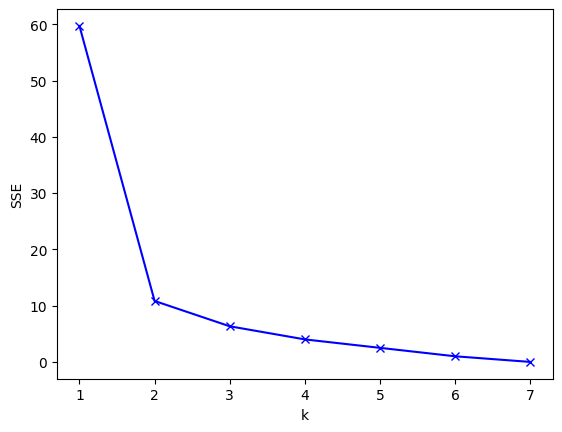

In [16]:
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    km = cluster.KMeans(n_clusters=k,n_init=10)
    km = km.fit(peliculas.iloc[:,1:])
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

5. Se elige el dataset de wine y se hace pca para dejar solo dos dimensiones.

In [17]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
# Cargar el conjunto de datos Iris
wine = load_wine()

# Crear un DataFrame con las características y etiquetas
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target']= wine.target


#pca
num_data = wine_df.select_dtypes('float64')
data_transformed_ = (num_data-num_data.min())/(num_data.max()-num_data.min())
pca = PCA(n_components=2)
pca.fit(data_transformed_.to_numpy())

projected = pca.transform(data_transformed_.to_numpy())
projected = pd.DataFrame(projected)
projected['class'] = wine_df['target'].values


Luego hacemos la gráfica ELBOW.

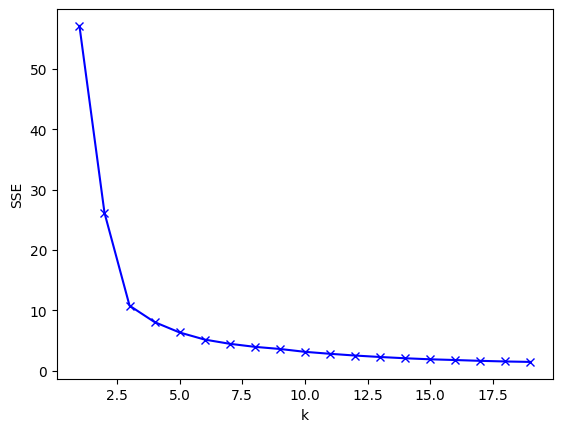

In [18]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = cluster.KMeans(n_clusters=k,n_init=10)
    km = km.fit(projected.iloc[:,:-1])
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

Como se ve en la gráfica, al principio SSE decrece rapidamente, pero luego del 3er punto, agregando más k no se disminuye significativamente, pero si se incrementa el costo computacional de calcular más clusters, por lo que el valor optimo esta en el "codo" en k=3 y SSE = 10.771762804100009.

## Hierarchical Clustering



###Ejemplo1
Usaremos un dataset de vertebrados (ejemplo de TAN) usado para clasificación. Se ejecutaran los tres algoritmos clásicos de agrupacion jerarquica aglomerativa: **single link (MIN), complete link (MAX), y  group average**, usando scipy library de python.



In [19]:
import pandas as pd
data = pd.read_csv('vertebrate.csv',header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


In [20]:
# importamos las librerías
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = data['Name']
Y = data['Class']
# Se eliminan la columna de nombre y la clase
X = data.drop(['Name','Class'],axis=1)

### Single Link (MIN)

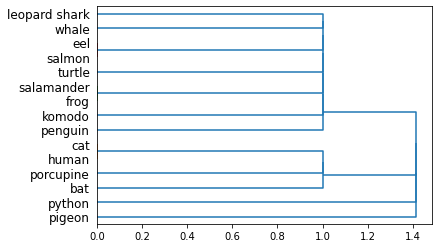

In [21]:
Z = hierarchy.single(X)
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

### Complete Link (MAX)

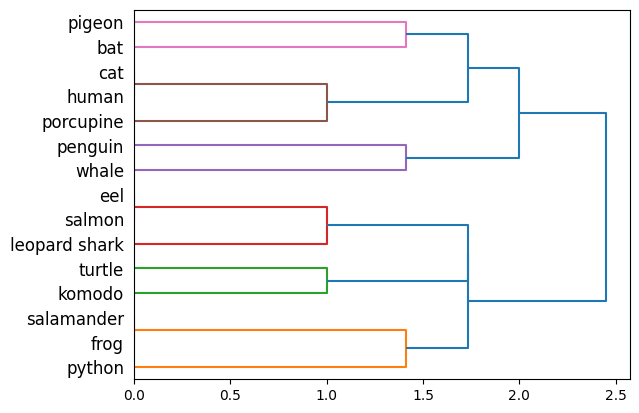

In [22]:
Z = hierarchy.complete(X)
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

### Average - Promedio

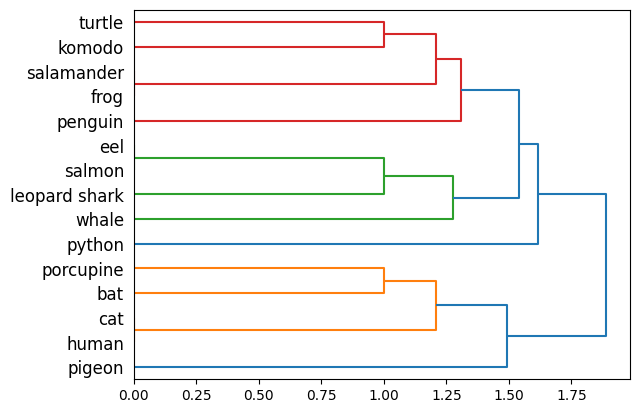

In [23]:
Z = hierarchy.average(X)
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

### Ward

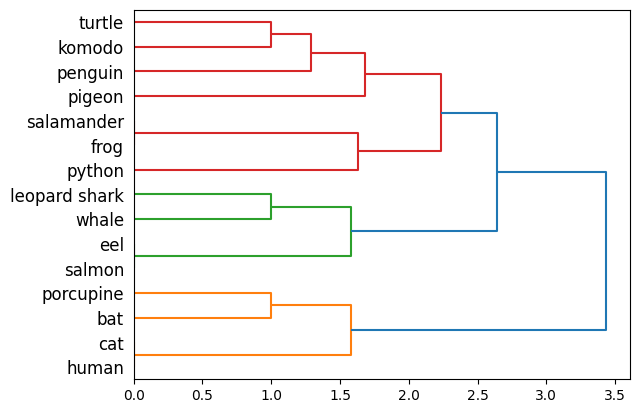

In [24]:
Z = hierarchy.ward(X)
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

**Ejercicio 1**

¿Qué concluye de los cuatro métodos? con respecto al conjunto de datos usado.

Usando cada método, se obtiene un resultado diferente y en algunos casos puede ser el menos acertado:

* usando el método de linkeo "single link", en la primera iteración está formando clusters que agrupan mal los datos, esto se puede ver en algunos clusters que agrupan mamiferos con reptiles, peces y otras especies, es por esto que para el conjunto de datos usado, no es el mejor enfoque. Como vemos en la gráfica este método puede producir clusters irregulares, este método es sensible al ruido y valores atípicos, así que hay que ser cuidadosos a la hora de aplicarlos.

* usando el método de linkeo "complete link", podemos observar que en la primera iteración fue un poco más preciso que el "single link", algunos clusters son más acertados ya que en se están juntando bien algunas aves, reptiles, mamiferos y peces. En la segunda iteración está juntando reptiles con peces y mamíferos con aves. A pesar de que en la primera iteración hizo una clasificación aceptable, en la segunda ya se formaron clusters que combinana datos de diferentes clases.

* Usando el método de linkeo "average", podemos ver que también tiene un buen desempeño en la primera iteración clasificando bien las especies, sien embargo algunos registros los está agrupando en clusters que no debería. Lo interesante de este método de linkeo es que en las siguientes iteraciones algunos clusters los está uniendo correctamente (esto no se ve en el single link). Sin embargo, hay que destacar que algunos clusters los está agrupando mal y, aunque puede tener un rendimiento mejor que los anteriores, para este conjunto de datos no sería el más optimo.

* Usando el método de linkeo "ward", este método que usa el enlace comparando la distancia con cada centroide.Podemos observar que frente a los otros métodos es el que presenta mejores resultados, ya que en las primera iteraciones está claisficando bien las especies y en general forma clusters más precisos.

En conclusión, utilizar o no un método de linkeo para un dataset puede llegar a ser muy relativo ya que cada uno tiene sus pros y contra. Lo que para algunos dataset puede llegar a ser más conveniente (hablando del linke), para otros usar el mismo enfoque puede generar resultados completamente diferentes y con baja calidad. Es por esto que es importante validar el tipo de datos que trabaja el dataset y la calidad de los clustes. Con esto se puede minimizar la probablildad de estar haciendo mal el procedimineto y poder determinar cuál método de linkeo es mejor utilizando la agrupación jerarquica en un dataset específico 

**Ejercicio 2** -JUAN

Dado un conjunto de ejemplos categóricos de 5 dimensiones:


In [25]:
from scipy.spatial import distance
import numpy as np
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import linkage, dendrogram, ward
import matplotlib.pyplot as plt

X = np.array([
              [ 1,0,1,1,0],
              [ 1,1,0,1,0],
              [ 0,0,1,1,0],
              [ 0,1,0,1,0],
              [ 1,0,1,1,0],
              [ 0,1,1,0,0],
             ])
X

array([[1, 0, 1, 1, 0],
       [1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 1, 0],
       [0, 1, 1, 0, 0]])

a) Aplique agrupamiento jerárquico aglomerativo, usando:

1) Medida intercluster enlace simple (single link o MIN) basado en el coeficiente de Rao. Diagramar el dendograma

2) Medida intercluster enlace completo (complete link o MAX) basado en coeficiente de corres-pondencia simple CCS (su sigla en inglés, SMC Simple Matching Coeficient). Diagramar el dendograma

b) ¿Es posible usar el método de Ward? Explique.

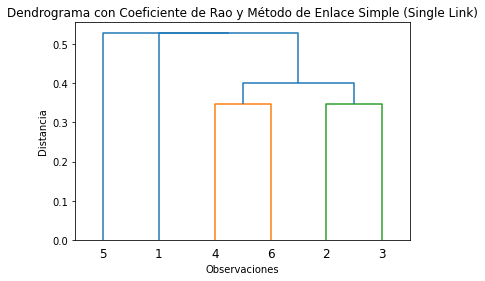

In [209]:
# Calcular la distancia de Rao entre las observaciones
def rao_distance(X, Y):
    return np.sum(X & Y) / (np.sum(X & Y) + np.sum(~X & Y) + np.sum(X & ~Y) + np.sum(~X & ~Y))

# Calcular las distancias de Rao entre todas las observaciones
rao_distances = squareform(pdist(X, rao_distance))

# Calcular el enlace jerárquico usando el método de enlace simple (single link) y la distancia de Rao
linkage_matrix = linkage(rao_distances, method='single')

# Generar el dendrograma
dendrogram(linkage_matrix, labels=[f'{i+1}' for i in range(len(X))])
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
plt.title('Dendrograma con Coeficiente de Rao y Método de Enlace Simple (Single Link)')
plt.show()

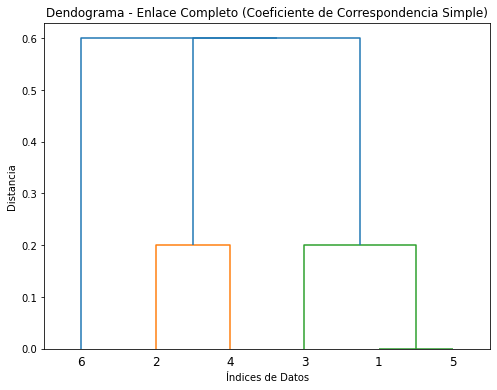

In [208]:
# Enlace completo usando el coeficiente de corres-pondencia simple (SMC)
linkage_matrix_complete = linkage(X, method='complete', metric='matching')

# Diagramar dendograma para el enlace completo
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix_complete, labels=np.arange(1, X.shape[0] + 1))
plt.title('Dendograma - Enlace Completo (Coeficiente de Correspondencia Simple)')
plt.xlabel('Índices de Datos')
plt.ylabel('Distancia')
plt.show()

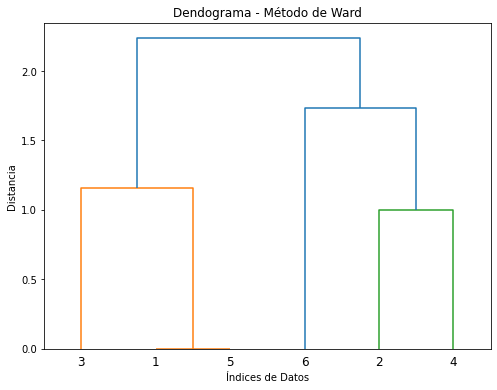

In [212]:
# Aplicar el método de Ward
linkage_matrix_ward = linkage(X, method='ward')

# Diagramar el dendograma para el método de Ward
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix_ward, labels=np.arange(1, X.shape[0] + 1))
plt.title('Dendograma - Método de Ward')
plt.xlabel('Índices de Datos')
plt.ylabel('Distancia')
plt.show()

Como vemos, se puede aplicar el método "ward", pero esto no es lo mejor, ya que la recomendación es que este método se usa apra agrupar datos numéricos continuos y no es muy conveniente cuando se tienen datos categóricos o binarios ya que este se se basa en la minimización de la suma de cuadrados. 

**Ejercicio 3** 

Usar el conjunto de datos [“Perfume Data Data Set”](https://archive.ics.uci.edu/ml/datasets/Perfume+Data#) del repositorio UCI (Machine Learning), para:
- Aplicar los algoritmos: single link, complete link average ling y Ward. Graficar dendogramas y explicar resultados.
- Aplicar PCA y nuevamente aplicar los algoritmos y graficar los dendogramas.

In [26]:
from scipy.spatial.distance import pdist
perfume_df = pd.read_excel('./perfume_data.xlsx',index_col=0,header=None)
perfume_df.index.rename('perfume',inplace=True)
perfume_df

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
perfume,,,,,,,,,,,,,,,,,,,,,
ajayeb,64558,64556,64543,64543,64541,64543,64543,64541,64541,64541,...,64541,64541,64541,64541,64541,64541,64528,64528,64528,64528
ajmal,60502,60489,61485,60487,61485,61513,60515,60500,60500,60487,...,60472,60472,60461,61470,60487,60487,61485,60487,60472,60472
amreaj,57040,57040,57040,58041,58041,58041,58041,57042,57042,58043,...,58041,58041,58041,58041,58041,58041,58041,58041,58041,58041
aood,71083,72087,71091,71095,71099,72103,71099,72099,72099,73098,...,72095,71095,71095,72103,71103,71103,71103,72103,72103,72098
asgar_ali,68209,68209,68216,68216,68223,68223,68223,68223,68230,68230,...,68230,67224,67217,67217,68223,68223,68223,68223,68223,68230
bukhoor,71046,71046,71046,71046,71046,71046,71046,71046,71046,70046,...,70049,70049,70049,70048,70049,70048,70046,70046,70048,71048
burberrry,61096,61096,60093,60092,60093,60093,61096,61096,61096,61096,...,60089,60089,60089,60092,60089,60089,60089,61088,61088,60089
dehenalaod,68132,69137,69137,68137,68137,69142,69142,68137,68137,68137,...,69142,69142,69142,69142,69142,68137,69137,69137,69137,69136
junaid,71590,71575,71574,71560,71560,71559,72573,71559,71559,71559,...,72557,72556,72556,72557,72556,72542,72542,72556,72556,72556


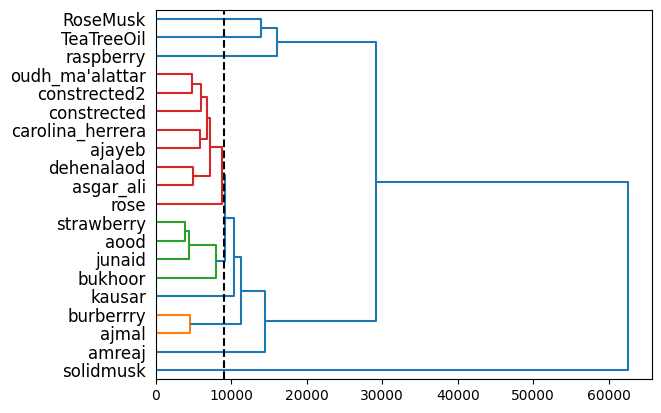

In [27]:
single_link_perfume =hierarchy.linkage(pdist(perfume_df.to_numpy()),method='single')
dn = hierarchy.dendrogram(single_link_perfume,labels=perfume_df.index.to_list(),orientation='right',color_threshold=9000)
plt.axvline(x = 9000, color = 'black', label = 'axvline - full height',ls='dashed')

inicialmente se unen RoseMusk TeaTreeOil, Oudh_ma'alattar y constrected, carolina_herrera y ajayeb, dehenalaod y asgar_ali, strawberry aood, burberry y ajmal. Luego se van agregando los restantes,  el ultimo en agregarse es solidmusk.visualmente se puede variar el umbral de visualización, los colores se asignan, segun la documentación de scipy con 0.7*max(single_link_perfume[:,2]) , que es ese caso es al rededor de 40000 por lo que inicialmente se ven solo dos colores. pero se puede variar ese umbral, que representaria el numero de clusters elejido, para mejor visualización. 


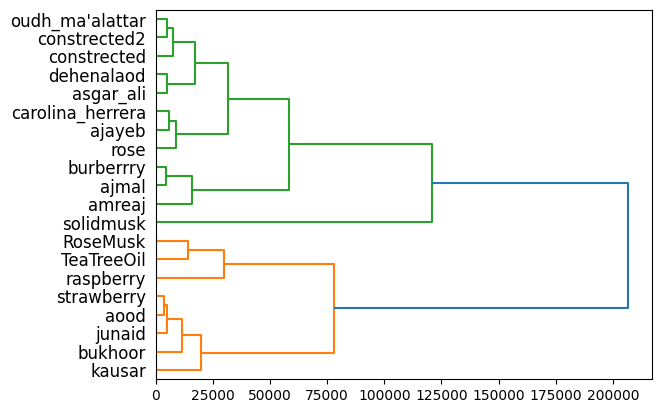

In [28]:
complete_link_perfume = hierarchy.complete(pdist(perfume_df.to_numpy()))
dn = hierarchy.dendrogram(complete_link_perfume,labels=perfume_df.index.to_list(),orientation='right')

Para el metodo de link complete, se obtienen clusters distintos, se puede ver que están más estratificados. se pueden ver 2 grupos distintivos, el primero contiene a oug-mah'alattar, constrected2, dehenalaod, asgar_ali, carolina_herrera, ajayeb,rose,burberrry,ajmal,amreaj y solid musk. mientras que el otro grupo contiene a RoseMusk, TeaTreeOil, raspberry,strawberry, aood, junaid, bukhoor,kausar.

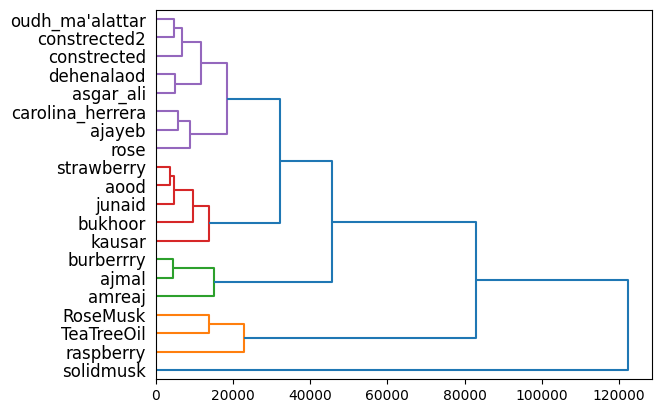

In [29]:
average_link_perfume = hierarchy.average(pdist(perfume_df.to_numpy()))
dn = hierarchy.dendrogram(average_link_perfume,labels=perfume_df.index.to_list(),orientation='right',color_threshold=30000)

Para la unión average se pueden apreciar mas grupos distintos, por ejemplo burberry, ajmal y amreaj son un grupo de 3, mientras que rose ajayeb, carolina_herrera , asgar_ali, dehenalaod, constrected, constrected2 y oudh_ma'alattar están en un grupo que se muestra de color morado.

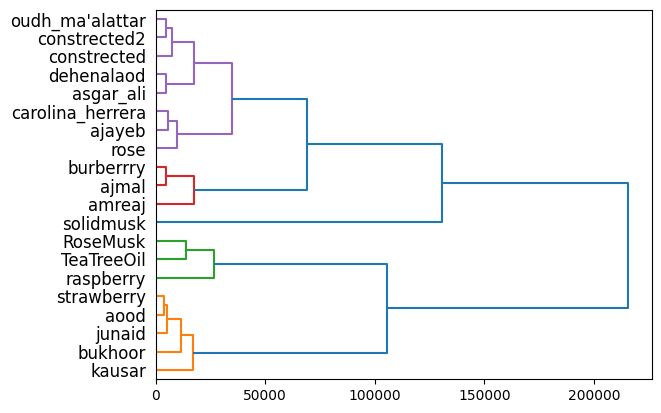

In [30]:
ward_link_perfume = hierarchy.ward(pdist(perfume_df.to_numpy()))
dn = hierarchy.dendrogram(ward_link_perfume,labels=perfume_df.index.to_list(),orientation='right',color_threshold=60000)

El método ward dio ocmo resultado otra estructura donde se pueden apreciar grupos similares a los obtenidos con link average. Se pueden ver grupos como strawberry, aood, junaid, bukhoor y kausar. Otro de estos grupos es burberry, ajmal y amreaj. La escogencia de grupos se basa enteramente en un umbral de partición, en este caso el umbral es de 60000.

Ahora se aplica antes de HC el pca

In [31]:
numComponents_initial =perfume_df.to_numpy().shape[1]
num_data = perfume_df.to_numpy()
data_transformed_ = (num_data-num_data.min())/(num_data.max()-num_data.min())
for numComponents in range(numComponents_initial):
    pca = PCA(n_components=numComponents)
    pca.fit(data_transformed_)
    if pca.explained_variance_ratio_.sum()>=0.999:
        break 
print(f'numero de componentes encontrado para mantener una proporcion de varianza del 90%: {numComponents}')
print(f'Explained variance ratio con {numComponents} componentes: {pca.explained_variance_ratio_.sum()}')
projected = pca.transform(data_transformed_)
projected = pd.DataFrame(projected)
projected.index = perfume_df.index
projected

numero de componentes encontrado para mantener una proporcion de varianza del 90%: 5
Explained variance ratio con 5 componentes: 0.9990660510138675


,0,1,2,3,4
perfume,,,,,
ajayeb,0.474706,-0.009724,-0.007279,-0.011719,0.003487
ajmal,0.974726,-0.009148,-0.008393,-0.010973,-0.041514
amreaj,1.374858,0.016225,-0.026217,-0.009400,-0.011056
aood,-0.520539,-0.018363,-0.037723,0.057384,-0.009478
asgar_ali,-0.019802,-0.027398,-0.013144,0.007781,0.009623
bukhoor,-0.315348,-0.050448,0.047843,-0.032233,0.012188
burberrry,1.019382,-0.024549,0.005801,0.033238,0.048267
dehenalaod,-0.114895,0.017559,-0.021453,-0.009841,-0.015363
junaid,-0.574156,0.046456,-0.024440,0.001116,0.004457


Para verificar las diferencias se hacen las graficas de ambos metodos una al lado de la otra.

Text(0.5, 1.0, 'original')

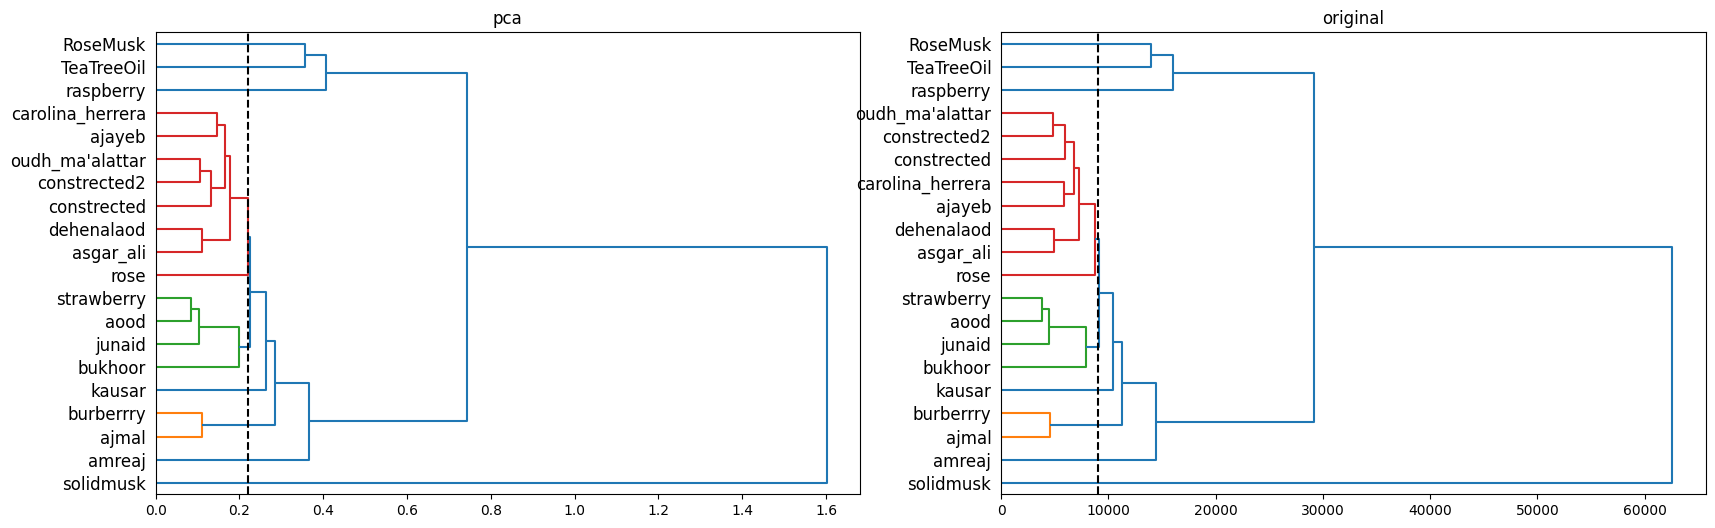

In [32]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
single_link_perfume_pca = hierarchy.single(pdist(projected.to_numpy()))
dn = hierarchy.dendrogram(single_link_perfume_pca,labels=projected.index.to_list(),orientation='right',color_threshold=0.22)
plt.axvline(x = 0.22, color = 'black', label = 'axvline - full height',ls='dashed')
plt.title('pca')
plt.subplot(1, 2, 2)
dn = hierarchy.dendrogram(single_link_perfume,labels=perfume_df.index.to_list(),orientation='right',color_threshold=9000)
plt.axvline(x = 9000, color = 'black', label = 'axvline - full height',ls='dashed')
plt.title('original')


Como se observa la escala ha cambiado, en el caso de pca, se hizo una normalización previamente por lo que los valores van hasta 1.6 . La estructura no cambia mucho, de hecho con un umbral de 0.22 para el dataset con pca y para el dataset completo con un umbral de 9000 se obtienen los mismos clusters. Cambia un poco el orden, pero los elementos de cada cluster son los mismos.

Text(0.5, 1.0, 'original')

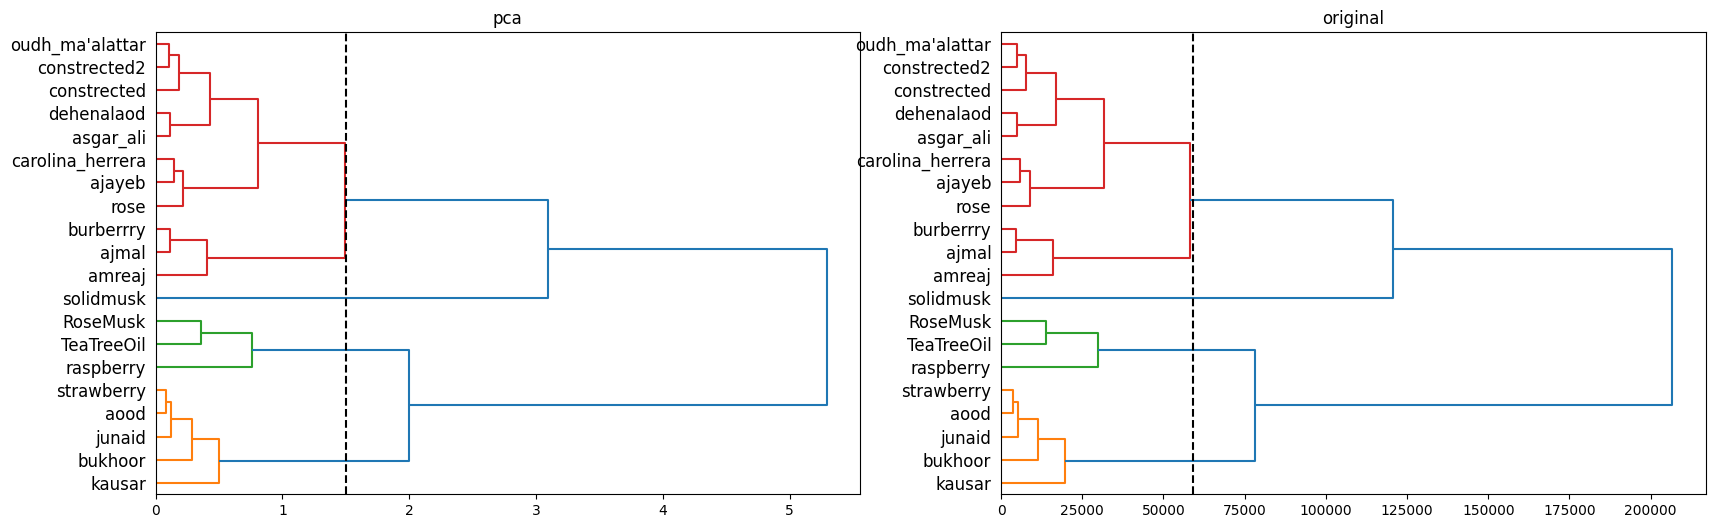

In [33]:

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.axvline(x = 9000, color = 'black', label = 'axvline - full height',ls='dashed')
complete_link_perfume_pca = hierarchy.complete(pdist(projected.to_numpy()))
dn = hierarchy.dendrogram(complete_link_perfume_pca,labels=projected.index.to_list(),orientation='right',color_threshold=1.5)
plt.axvline(x = 1.5, color = 'black', label = 'axvline - full height',ls='dashed')
plt.title('pca')
plt.subplot(1, 2, 2)
dn = hierarchy.dendrogram(complete_link_perfume,labels=perfume_df.index.to_list(),orientation='right',color_threshold=59000)
plt.axvline(x = 59000, color = 'black', label = 'axvline - full height',ls='dashed')
plt.title('original')



De nuevo la escala cambia pero la estructura en si del dendograma no varia mucho. Con una elección adecuada de umbral para ambos casos se obtienen los mismos cluasters

Text(0.5, 1.0, 'original')

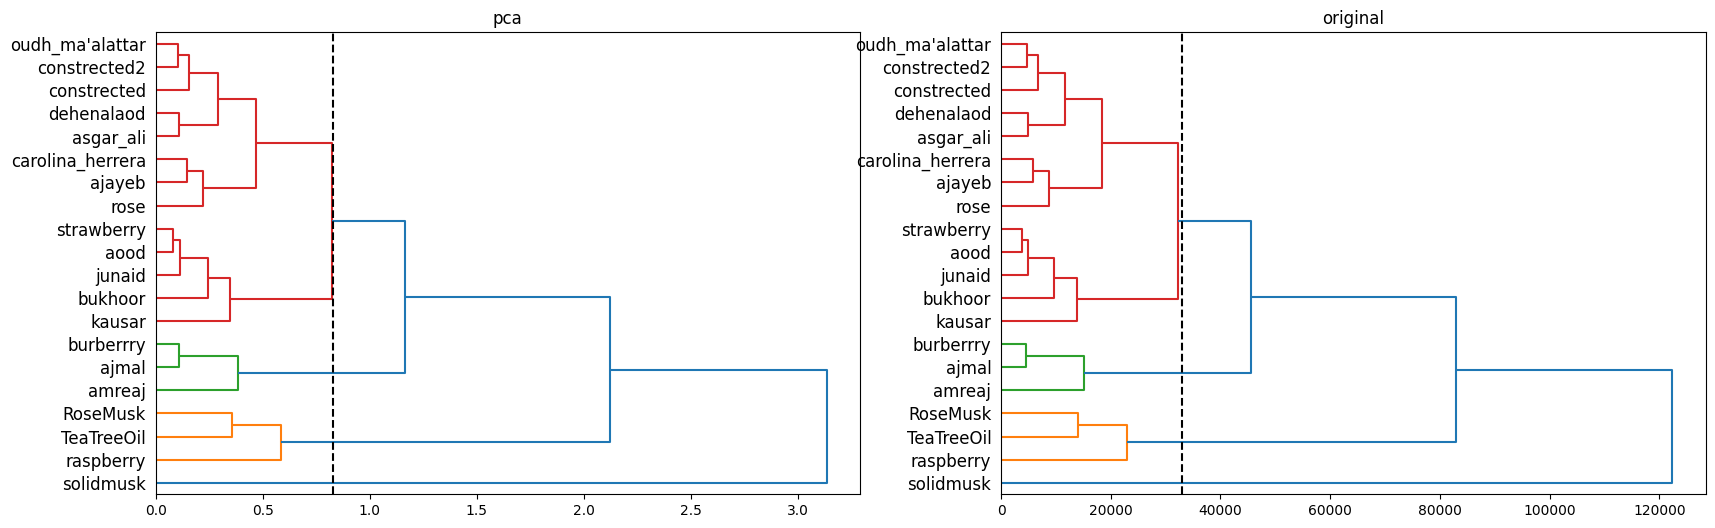

In [34]:

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.axvline(x = 9000, color = 'black', label = 'axvline - full height',ls='dashed')
average_link_perfume_pca = hierarchy.average(pdist(projected.to_numpy()))
dn = hierarchy.dendrogram(average_link_perfume_pca,labels=projected.index.to_list(),orientation='right',color_threshold=0.83)
plt.title('pca')
plt.axvline(x = 0.83, color = 'black', label = 'axvline - full height',ls='dashed')
plt.subplot(1, 2, 2)
dn = hierarchy.dendrogram(average_link_perfume,labels=perfume_df.index.to_list(),orientation='right',color_threshold=33000)
plt.axvline(x = 33000, color = 'black', label = 'axvline - full height',ls='dashed')
plt.title('original')


Text(0.5, 1.0, 'original')

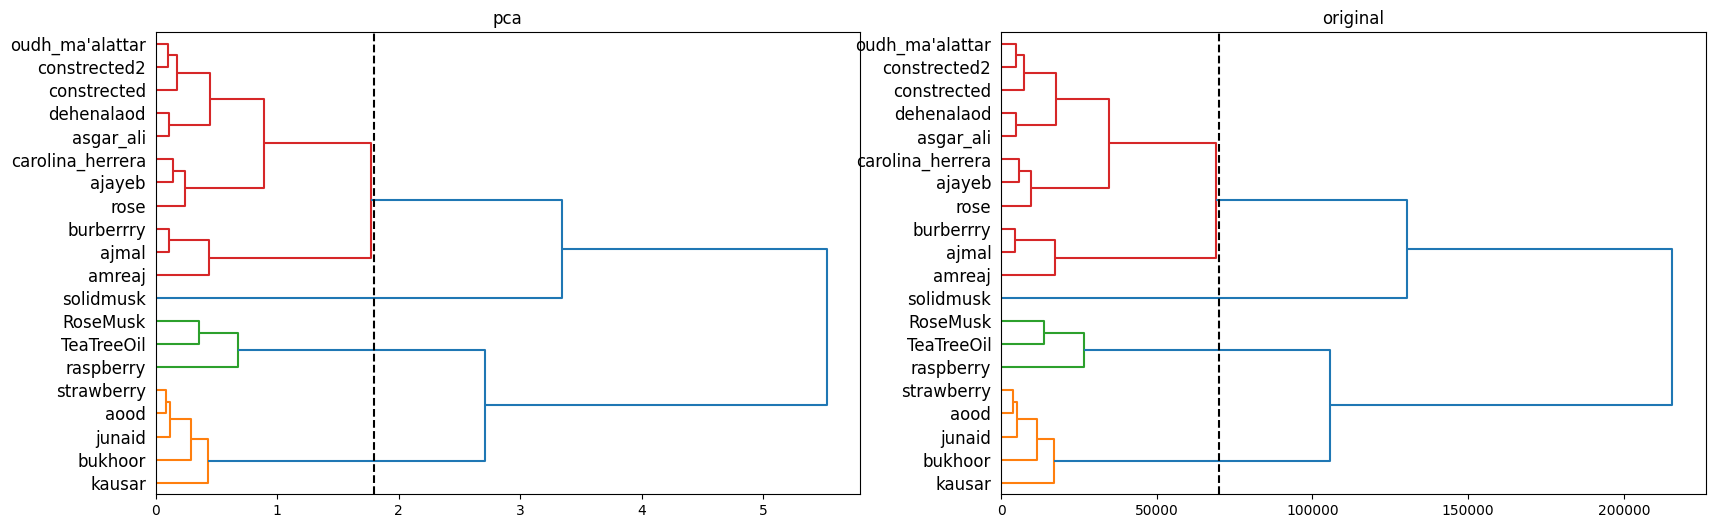

In [35]:

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.axvline(x = 9000, color = 'black', label = 'axvline - full height',ls='dashed')
ward_link_perfume_pca = hierarchy.ward(pdist(projected.to_numpy()))
dn = hierarchy.dendrogram(ward_link_perfume_pca,labels=projected.index.to_list(),orientation='right',color_threshold=1.8)
plt.title('pca')
plt.axvline(x = 1.8, color = 'black', label = 'axvline - full height',ls='dashed')
plt.subplot(1, 2, 2)
dn = hierarchy.dendrogram(ward_link_perfume,labels=perfume_df.index.to_list(),orientation='right',color_threshold=70000)
plt.axvline(x = 70000, color = 'black', label = 'axvline - full height',ls='dashed')
plt.title('original')


Como en los casos anteriores hay un cambio de escala, pero la estructura original se mantiene.
Como conclusión, se puede ver que a pesar que se redujeron 28 variables iniciales a 5 variables usando PCA, la información que queda es suficiente para obtener practicamente el mismo resultado, esto es valioso ya que computar este tipo de algoritmos con 23 variables menos es computacionalmente menos costoso.


**Ejercicio 4**

Usar el data set creado en la sección "Determinar el número de K" y construya un dendograma con distancia euclidiana (from sklearn.metrics.pairwise import euclidean_distances), y otro con similitud coseno (puede utilizar la función de scikit-learn [cosine similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html)). Discuta los resultados.

c:\Users\acmor\miniconda3\envs\mlcourse\Lib\site-packages\scipy\cluster\hierarchy.py:282: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='single', metric='euclidean')


Text(0.5, 1.0, 'cosine')

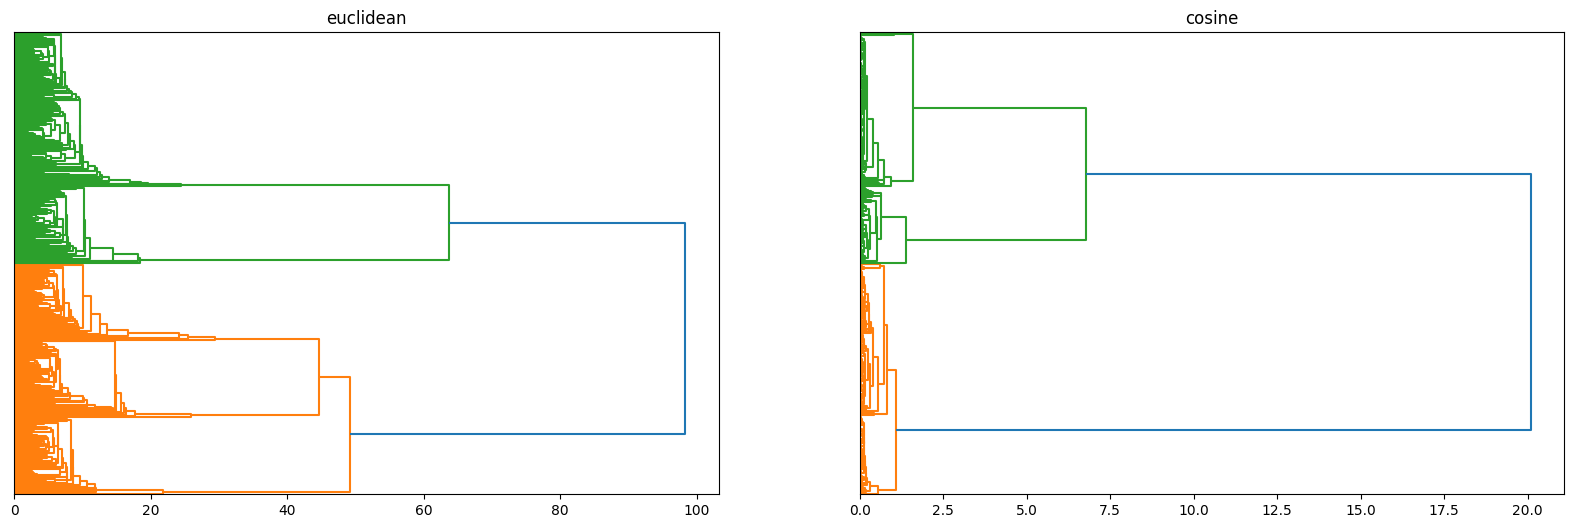

In [36]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

X,_ = make_blobs(600, cluster_std=1.2, centers=6, random_state=10)
eu_dist = euclidean_distances(X)
cosine_similarity_dist =cosine_similarity(X)

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
eu_den = hierarchy.single(eu_dist)
dn = hierarchy.dendrogram(eu_den,orientation='right',no_labels=True)
plt.title('euclidean')
plt.subplot(1, 2, 2)
cos_den = hierarchy.single(cosine_similarity_dist)
dn = hierarchy.dendrogram(cos_den,orientation='right',no_labels=True)
plt.title('cosine')


Son 600 puntos por lo que por facilidad visual no se etiquetan las instancias graficadas. Se puede ver en el caso de distancia euclideana que el rango va de 0 a 100 y se distinguen 2 grupos, además estan más alargados. En cambio con la distnacia de coseno el rango de distancias van desde 0 a 20, también se distinguen 2 grupos, pero estan confinados a una sección entre 0 y 2.5, las distancias son menores entre si.

## K-Nearest Neighbor

**Ejercicio 1**

Crear un conjunto sintetico de 5 clusters:

Text(0, 0.5, '$x_2$')

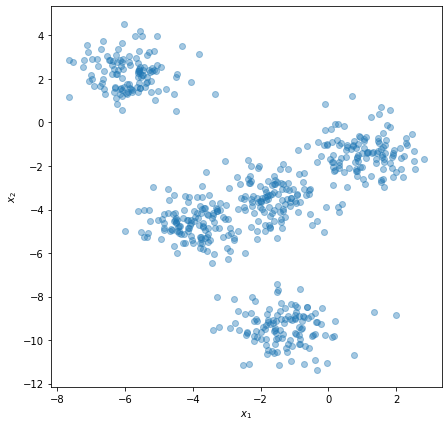

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

np.random.seed(2)
# Creación de un dataset sintético de 5 grupos con 600 puntos (se incluyen valores negativos)
X,_=make_blobs(n_samples=600,centers=5, cluster_std=0.8)
plt.figure(figsize=(7,7))
plt.scatter(X[:,0],X[:,1],alpha=0.4)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Usar el algoritmo de K-Nearest Neighbor y distancia Euclidean para agrupar los datos. Probar con varios valores de umbral.

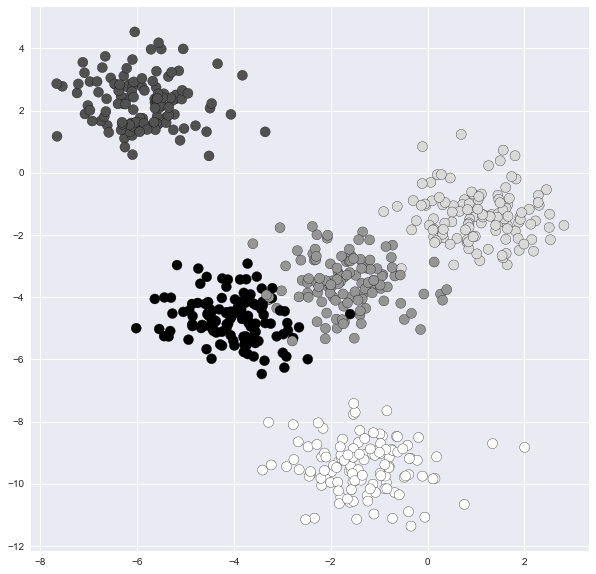

In [2]:

plt.style.use('seaborn')
plt.figure(figsize = (10,10))
plt.scatter(X[:,0],X[:,1], c=_, marker= 'o',s=100,edgecolors='black')
# plt.show()

In [3]:
#Splitting-data-into-training-and-testing-datasets
X_train, X_test, y_train, y_test = train_test_split(X, _, random_state = 0)

In [4]:
#knn-classifier-implementation
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn3 = KNeighborsClassifier(n_neighbors= 3)
knn1 = KNeighborsClassifier(n_neighbors= 1)

#Pedictions-for-the-knn-classifiers

knn5.fit(X_train, y_train)
knn3.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_3 = knn3.predict(X_test)
y_pred_1 = knn1.predict(X_test)

#Predict-accuracy-for-both-k-values
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=3", accuracy_score(y_test, y_pred_3)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)

Accuracy with k=5 99.33333333333333
Accuracy with k=3 99.33333333333333
Accuracy with k=1 99.33333333333333


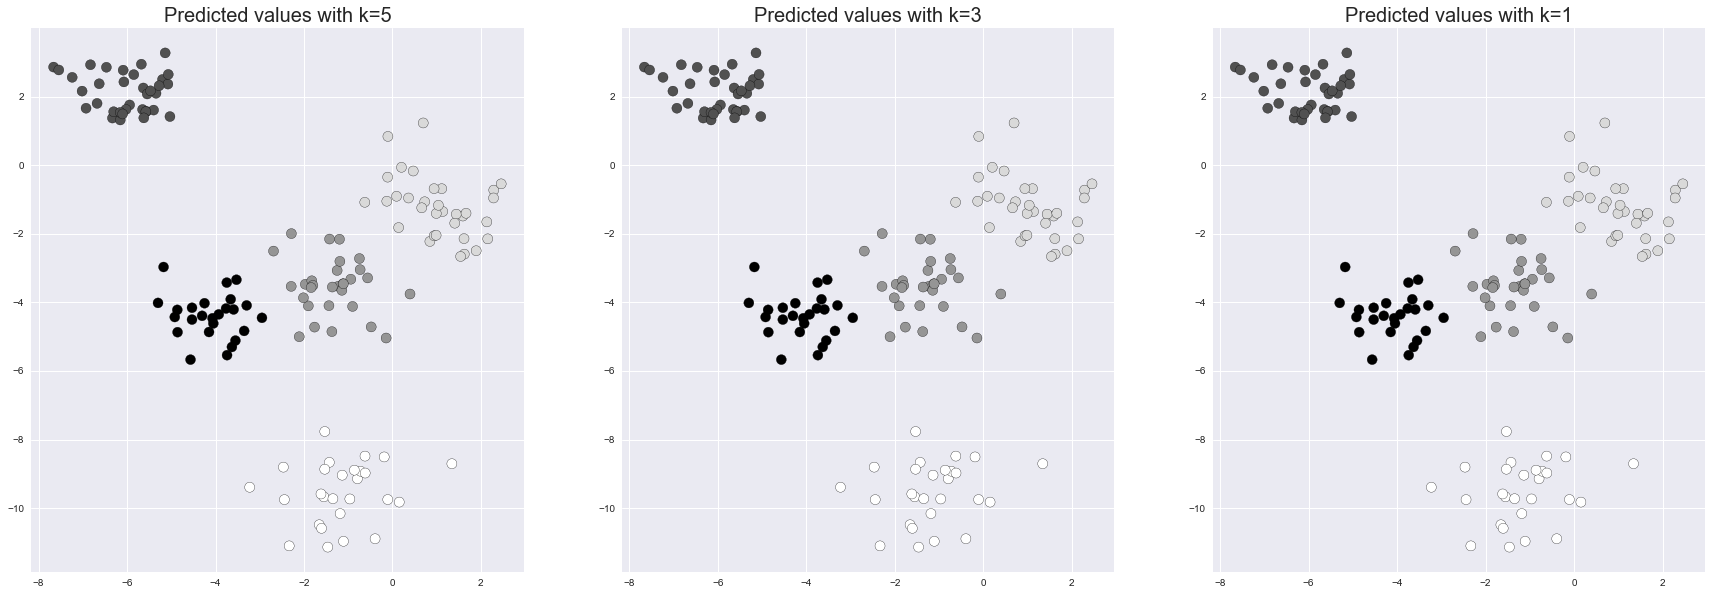

In [13]:
# #Visualizar

# Crear los subplots en una sola fila
plt.figure(figsize=(30, 10))

# Primer gráfico
plt.subplot(1, 3, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_5, marker='o', s=100, edgecolors='black')
plt.title("Predicted values with k=5", fontsize=20)

# Segundo gráfico
plt.subplot(1, 3, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_3, marker='o', s=100, edgecolors='black')
plt.title("Predicted values with k=3", fontsize=20)

# Tercer gráfico
plt.subplot(1, 3, 3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_1, marker='o', s=100, edgecolors='black')
plt.title("Predicted values with k=1", fontsize=20)

# Mostrar los gráficos
plt.show()

Podemos ver que con todos los valores se tiene del 99.3% de precisiçon. Podemos ver que con un n_neighbors= 1 es suficiente para hacer que el algoritmo encuentre bien los clusters

**Ejercicio 2**

Usar el algoritmo de agrupación K-Nearest Neighbor y distancia Euclidean para agrupar los datos del ejercicio 3. Usar un umbral de 4.

KNN se usa por lo general para realizar clasificación con datos etiquetados, se le asigna la etiqueta de los k vecinos más cercanos. En esta caso para hacer clustering se usaran los k vecinos más cercanos para crear clusters, de manera que se tiene los centroides iniciales a1, a4 y a7

In [66]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

A1=(2,10)
A2=(2,5)
A3=(8,4) 
A4=(5,8)
A5=(7,5)
A6=(6,4)
A7=(1,2)
A8=(4,9)
df = pd.DataFrame(data=[A1,A2,A3,A4,A5,A6,A7,A8])

knn = NearestNeighbors(n_neighbors=4,metric='euclidean')
knn.fit(df.to_numpy())
neighbors = knn.kneighbors(df.to_numpy(), 4, return_distance=False)
neighbors



array([[0, 7, 3, 1],
       [1, 6, 5, 3],
       [2, 4, 5, 3],
       [3, 7, 4, 0],
       [4, 5, 2, 3],
       [5, 4, 2, 3],
       [6, 1, 5, 4],
       [7, 3, 0, 1]], dtype=int64)

Se toman los vecinos, con la libreria scikit learn el paquete NearestNeighbors, para el caso de los centroides iniciales, osea la fila 0, 3 y 6 la etiqueta se fija. luego se toma en orden el primer elemento que aparezca que sea una de las etiquetas. por ejemplo para la fila 1, el primer elemento mas cercano es el mismo y luego el elemento 6, y ya que este es uno de los centroides se asigna al grupo a6. asi sucesivamente, esto se hace manualmente ya que es un dataset pequeño. El resultado se muestra en la siguiente gráfica.

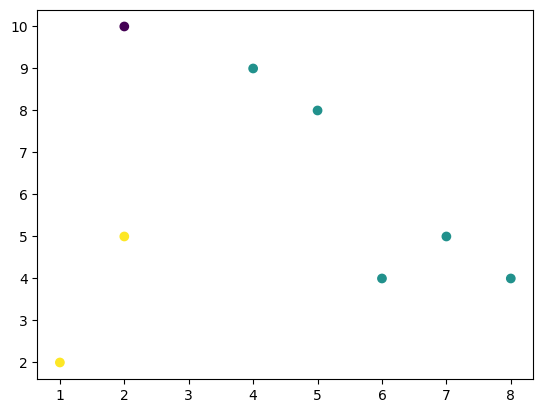

In [84]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cluster_labels_numeric = label_encoder.fit_transform(['a0','a6','a3','a3','a3','a3','a6','a3'])
plt.scatter(df[0], df[1], c=cluster_labels_numeric , cmap='viridis')

---------
**REFERENCIAS**

[1] TAN y otros. Introduction to Data Mining  (segunda edición)